In [1]:
import sys
import scri
import sxs
import numpy as np
import csv
import cmath
import quaternion
from quaternion import rotate_vectors
from matplotlib import pyplot as plt
from scri import flux
import functools
from scri import waveform_base
from scipy.integrate import trapz as integrate

In [4]:
SA_path="/home/khushal/Desktop/Python/SXS data/SXS:BBH:0023/"
Sim_path=""
Waveform_path="rhOverM_Asymptotic_GeometricUnits_CoM.h5/Extrapolated_N4.dir"
md = sxs.metadata.Metadata.from_file(SA_path + Sim_path + "metadata.txt")    
h = scri.SpEC.read_from_h5(SA_path + Sim_path + Waveform_path)
M = md['remnant_mass']

In [5]:
errors = []
for β in [0.1, 0.01, 0.001, 0.0001]:
    v = [β,0.0,0.0]
    beta = np.linalg.norm(v)
    g_m = (1/(1 - beta**2))**(1/2)
    hp = h.transform(boost_velocity=v)
    B_dotp = scri.boost_flux(hp)
    Boost_matrix = [[g_m ,  g_m * beta, 0,0], [ g_m * beta, g_m, 0, 0], [0,0,1,0],[0,0,0,1]]
    B_dot = scri.boost_flux(h.interpolate(hp.t)) 
    for i in range(len(hp.t)):
        Bondi_p_dot[i,:] = np.transpose(np.dot(Boost_matrix, np.transpose(Bondi_p_dot[i,:])))   
    error = w1 - w2
    errors.append(np.abs(integrate(error, h.t)) / (h.t[-1] - h.t[0]))
plt.loglog([0.1, 0.01, 0.001, 0.0001],errors,'+')
plt.show()

AttributeError: module 'scri' has no attribute 'boost_flux'

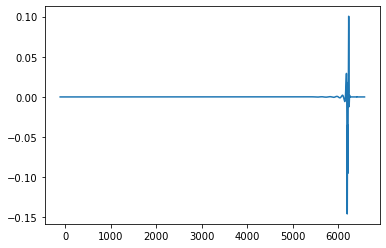

In [5]:
plt.plot(h.t, scri.boost_flux(h)[:,0])